# Examen Módulo 3 - Optimización. <font color=blue>Tipo de examen 1</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen3_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen3_JimenezEsteban*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

## Primer punto. Optimización de funciones escalares usando `sympy` (25 puntos).

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

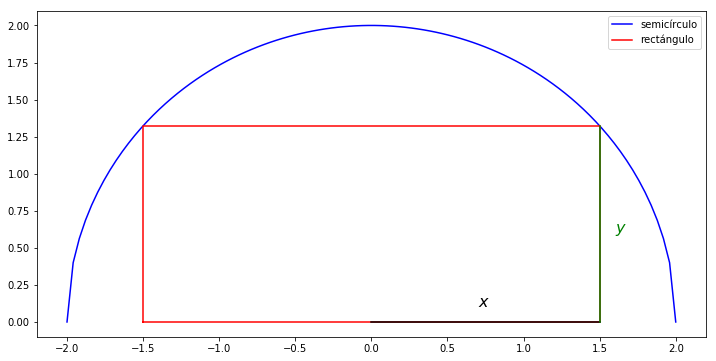

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1 (10 puntos).** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en LaTeX, en celdas Markdown.

**Solución punto 1.**

El área del rectángulo es $A_R=b \times h$. Pero la base y la altura tienen las siguientes expresiones:
- $b = 2x$,
- $h = y$.

Como el punto $(x,y)$ está ubicado sobre un círculo de radio 2, entonces 

$$x^2+y^2=4$$

y por tanto $y=\sqrt{4-x^2}$. Finalmente, el área del rectángulo en función de la variable $x$ se puede escribir como:

$$A_R(x)=2x\sqrt{4-x^2},$$

y el dominio de esta función es $\mathcal{D}_{A_R}=\left[0,2\right]$.

**Punto 2 (10 puntos).** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

**Solución punto 2.**

In [3]:
import sympy as sym

In [4]:
sym.init_printing(use_latex='mathjax')

In [5]:
sym.var('x')

x

In [6]:
def AR(x):
    return 2*x*(4-x**2)**0.5

In [7]:
dAR = sym.diff(AR(x), x)
p_crit = sym.solve(dAR, x)
p_crit

[-1.4142135623731, 1.4142135623731]

In [8]:
AR(0), AR(p_crit[1]), AR(2)

(0.0, 4.0, 0.0)

El valor máximo de la función $A_R(x)$ es 4, y ocurre cuando $x=1.4142135623731$.

**Punto 3 (5 puntos).** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

**Solución punto 3.**

Las dimensiones del rectángulo resultante son, b:

In [9]:
2*p_crit[1]

2.82842712474619

y, h:

In [13]:
(4-p_crit[1]**2)**0.5

1.41421356237309

## Segundo punto. Programación lineal (25 puntos).

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador trabaja cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1 (15 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

**Solución punto 1.**

Como se quiere minimizar la cantidad total de trabajadores, entonces:

$$\min_{x_1,\dots,x_7}x_1+x_2+x_3+x_4+x_5+x_6+x_7$$

Además, por la cantidad mínima de trabajadores por día, se tiene que:

- $x_1+x_4+x_5+x_6+x_7\geq 14$,
- $x_1+x_2+x_5+x_6+x_7\geq 13$,
- $x_1+x_2+x_3+x_6+x_7\geq 15$,
- $x_1+x_2+x_3+x_4+x_7\geq 16$,
- $x_1+x_2+x_3+x_4+x_5\geq 19$,
- $x_2+x_3+x_4+x_5+x_6\geq 18$, 
- $x_3+x_4+x_5+x_6+x_7\geq 11$, y
- $x_i\geq 0$.

In [10]:
# Escriba acá las matrices como arreglos de Numpy
c = np.array([1, 1, 1, 1, 1, 1, 1])
A = np.array([[-1, 0, 0, -1, -1, -1, -1],
              [-1, -1, 0, 0, -1, -1, -1],
              [-1, -1, -1, 0, 0, -1, -1],
              [-1, -1, -1, -1, 0, 0, -1],
              [-1, -1, -1, -1, -1, 0, 0],
              [0, -1, -1, -1, -1, -1, 0],
              [0, 0, -1, -1, -1, -1, -1]])
b = -np.array([14, 13, 15, 16, 19, 18, 11])

**Punto 2 (10 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [11]:
import scipy.optimize as opt

In [12]:
res_restaurante = opt.linprog(c, A_ub=A, b_ub=b)
res_restaurante

     fun: 22.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([ 0.,  4.,  0.,  0.,  0.,  0.,  0.])
  status: 0
 success: True
       x: array([ 4.,  7.,  1.,  4.,  3.,  3.,  0.])

Son necesarios en total 22 trabajadores.

## Tercer punto. Ajuste de curvas (25 puntos).

**Enunciado**. El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

**Punto 1 (5 puntos).** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [13]:
import pandas as pd

In [18]:
data_file = 'population_data.csv'
data = pd.read_csv(data_file, header=None)

In [19]:
data

,0,1,2,3
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
5,1955,32906,1377917,407522
6,1956,33978,1427722,368740
7,1957,35095,1485202,414545
8,1958,36253,1447578,404529
9,1959,37448,1589606,396924


**Punto 2 (15 puntos).** Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [26]:
x = data.iloc[:, 0].values/1000
y = 1000*data.iloc[:, 1].values/100000000

In [27]:
def fun_obj(B, x, y, n):
    return np.mean((y-np.array([x**i for i in range(n+1)]).T.dot(B))**2)

In [28]:
import scipy.optimize as opt

In [31]:
B01 = np.zeros(2)
ajuste1 = opt.minimize(fun_obj, B01, args=(x,y,1))
B02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, B02, args=(x,y,2))
B03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, B03, args=(x,y,3))

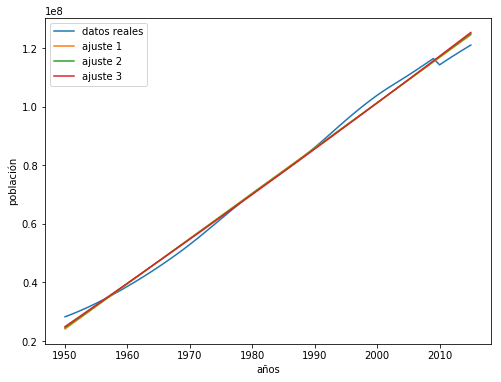

In [34]:
yhat1 = ajuste1.x[0]+ajuste1.x[1]*x
yhat2 = ajuste2.x[0]+ajuste2.x[1]*x+ajuste2.x[2]*x**2
yhat3 = ajuste3.x[0]+ajuste3.x[1]*x+ajuste3.x[2]*x**2+ajuste3.x[3]*x**3

plt.figure(figsize=(8,6))
plt.plot(x*1000, y*100000000, label = 'datos reales')
plt.plot(x*1000, yhat1*100000000, label = 'ajuste 1')
plt.plot(x*1000, yhat2*100000000, label = 'ajuste 2')
plt.plot(x*1000, yhat3*100000000, label = 'ajuste 3')
plt.xlabel('años')
plt.ylabel('población')
plt.legend(loc='best')
plt.show()

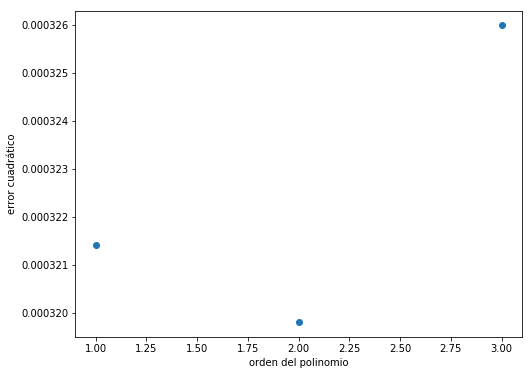

In [36]:
ems1 = np.mean((y-yhat1)**2)
ems2 = np.mean((y-yhat2)**2)
ems3 = np.mean((y-yhat3)**2)

plt.figure(figsize=(8,6))
plt.plot([1,2,3],[ems1,ems2,ems3], 'o')
plt.xlabel('orden del polinomio')
plt.ylabel('error cuadrático')
plt.show()

Según la gráfica anterior, el polinomio que mejor se ajusta es el de segundo orden.

**Punto 3 (5 puntos).** Con los polinomios ajustados en el punto anterior, estime la población en el año 2016 y compare con el dato real 127,5 millones.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

In [37]:
def fun(x):
    return (ajuste2.x[0]+ajuste2.x[1]*(x/1000)+ajuste2.x[2]*(x/1000)**2)*100000000

In [38]:
predic2016 = fun(2016)
predic2016

126461126.477

## Cuarto punto. Clasificador binario (25 puntos)

**Enunciado.** Se tienen datos de peso (kg) y de estatura (m) de 100 pacientes. Además, para cada uno de ellos se tiene una clasificación si está en sobrepeso (1) o no (0). Los datos son los siguientes:

In [39]:
x1 = 1.5 + 0.5*np.random.random((100,1))
x2 = 45 + 70*np.random.random((100,1))
X = np.concatenate((x1, x2), axis = 1)
Y = (X[:, 1]/X[:, 0]**2 > 25*np.ones((100,)))*1

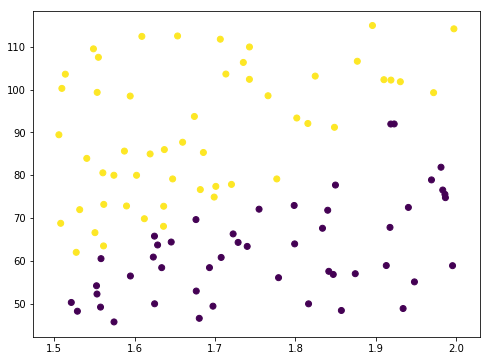

In [40]:
plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

**Punto 1 (15 puntos).** Diseñe un clasificador binario por regresión logística lineal utilizando únicamente los datos de los primeros 80 pacientes. Muestre, además, el gráfico de la división del clasificador con los puntos de entrenamiento.

**Solución punto 1.**

In [46]:
# Funciones útiles
def fun_log(z):
    return 1/(1+np.exp(-z))
def reg_log(B, X):
    Xa = np.append(np.ones((X.shape[0],1)), X, axis=1)
    return fun_log(Xa.dot(B))

In [47]:
def fun_obj(B, X, Y):
    Yhat = 0.99999*reg_log(B, X)
    return np.mean(-Y*np.log(Yhat)-(1-Y)*np.log(1-Yhat))

In [48]:
Xtrain = X[:80,:]
Ytrain = Y[:80]

In [49]:
B0 = np.zeros(3)
res_clas = opt.minimize(fun_obj, B0, args=(Xtrain,Ytrain))
res_clas

      fun: 0.03359661185997704
 hess_inv: array([[  3.84776887e+01,   1.81518589e+00,  -4.89331925e-01],
       [  1.81518589e+00,   1.18477426e+00,   1.98931631e-02],
       [ -4.89331925e-01,   1.98931631e-02,   1.98534362e-02]])
      jac: array([ -1.10827386e-07,  -1.84401870e-07,  -4.82378528e-06])
  message: 'Optimization terminated successfully.'
     nfev: 350
      nit: 47
     njev: 70
   status: 0
  success: True
        x: array([ 222.90266241, -262.57511492,    3.06355388])

In [50]:
x = np.arange(1.4, 2.1, 0.01)
y = np.arange(30, 130, 0.5)
Xm, Ym = np.meshgrid(x, y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n,1))
Ymr = np.reshape(Ym,(m*n,1))

In [51]:
Xproof = np.append(Xmr,Ymr,axis=1)

In [53]:
Yg = reg_log(res_clas.x, Xproof)
Z = np.reshape(Yg, (m,n))
Z = np.round(Z)

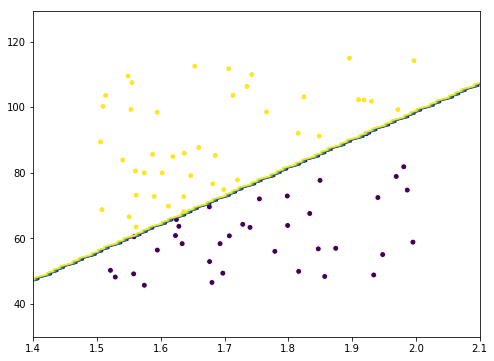

In [54]:
plt.figure(figsize=(8,6))
plt.contour(Xm, Ym, Z)
plt.scatter(Xtrain[:, 0],Xtrain[:, 1], c=Ytrain, edgecolors='w')
plt.show()

**Punto 2 (10 puntos).** Utilice el clasificador diseñado para clasificar a los 20 pacientes restantes. ¿Cuántos pacientes se clasifican bien? ¿Cuántos mal?

**Solución punto 2.**

In [55]:
Xtest = X[80:,:]
Ytest = Y[80:]

In [62]:
Yhat = np.round(reg_log(res_clas.x, Xtest)).astype(int)

In [63]:
Ytest

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [64]:
Yhat

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

In [66]:
np.sum(np.abs(Ytest-Yhat))

1

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>